In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

In [6]:
from google.colab import files
uploaded = files.upload()


Saving Training data.xlsx to Training data.xlsx


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Test data.xlsx to Test data.xlsx


    internet sex  traveltime  studytime  freetime  absences  age   iq  marks
0         no   M           2          2         5         6   18  118  73.13
1        yes   M           2          2         2         7   19  107  67.78
2        yes   M           3          3         3         5   18  108  70.84
3         no   F           3          3         4         9   17  100  66.68
4        yes   M           1          4         3         4   19   96  71.88
..       ...  ..         ...        ...       ...       ...  ...  ...    ...
995      yes   M           2          1         1         9   18  108  64.12
996       no   M           1          2         2         2   19  109  75.47
997      yes   M           2          2         1         5   17  123  76.73
998      yes   F           1          3         3         8   17  104  69.07
999      yes   M           1          2         2         6   18  128  78.73

[1000 rows x 9 columns]


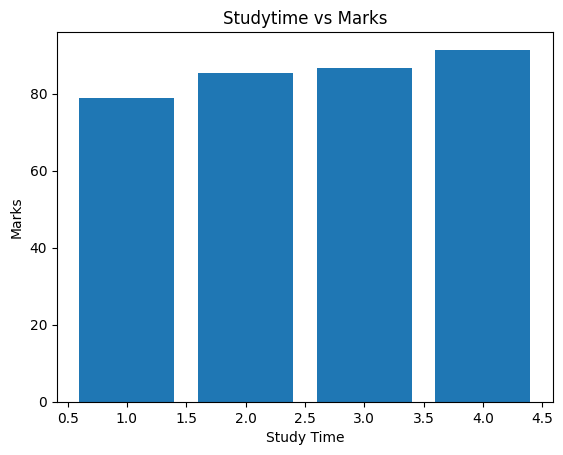

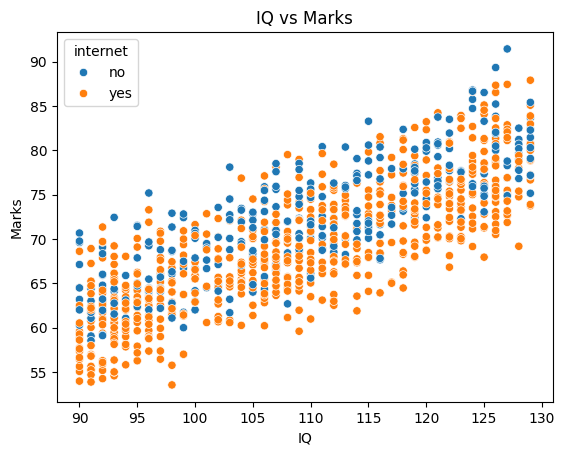

male avg69.81720970537262, female average70.1476595744681


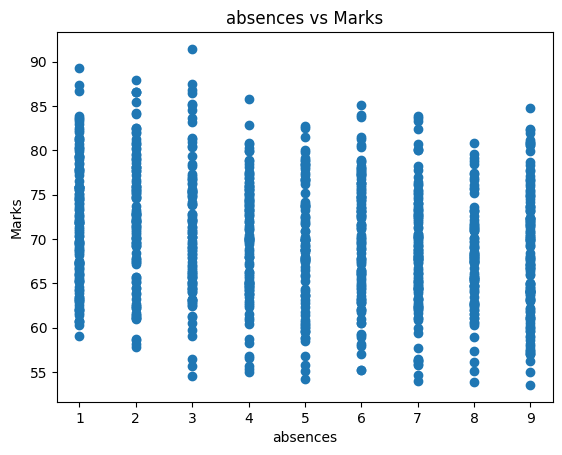

no net avg72.05028301886793, internet average68.98093841642229


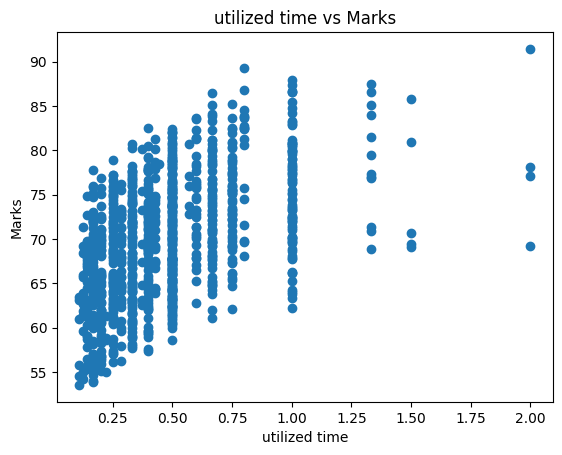

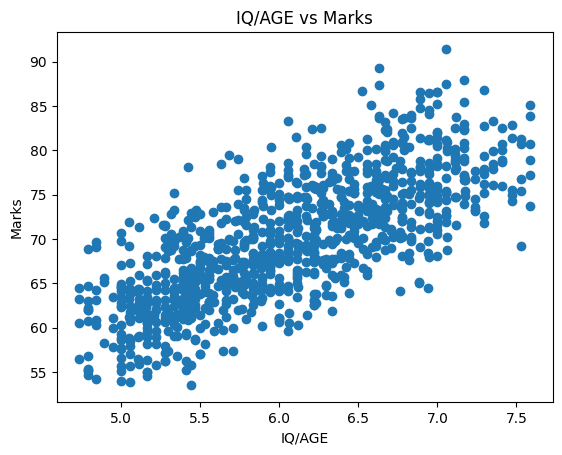

In [70]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = (data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)
print(data)
# Try plotting y_train with different features

#plt.xlabel('Age')
#plt.ylabel('Marks')
#plt.title('Age vs Marks')
#plt.bar(data['age'],data['marks'])#with increasing iq marks increase
#plt.show()
plt.xlabel('Study Time')
plt.ylabel('Marks')
plt.title('Studytime vs Marks')
plt.bar(data['studytime'],data['marks'])#with increasing iq marks increase
plt.show()
#plt.xlabel('freetime')
#plt.ylabel('Marks')
#plt.title('freetime vs Marks')
#plt.bar(data['freetime'],data['marks'])#with increasing iq marks increase
#plt.show()
sns.scatterplot(x='iq', y='marks', data=data, hue='internet')

# Add labels and title
plt.xlabel('IQ')
plt.ylabel('Marks')
plt.title('IQ vs Marks')

# Show the plot
plt.show()

##so ultimately studytime, IQ make a difference
df_male=data[data['sex']=='M']
mm=df_male['marks'].mean()
df_female=data[data['sex']=='F']
fm=df_female.marks.mean()
print(f'male avg{mm}, female average{fm}')#very close, no difference

plt.scatter(data['absences'],data['marks'])#, data=data)

# Add labels and title
plt.xlabel('absences')
plt.ylabel('Marks')
plt.title('absences vs Marks')

# Show the plot
plt.show()

df_nonet=data[data['internet']=='no']
nonetmean=df_nonet['marks'].mean()
df_net=data[data['internet']=='yes']
netmean=df_net.marks.mean()
print(f'no net avg{nonetmean}, internet average{netmean}')#very close, no difference





# To get an idea whether to add some features or not


# Add some features if required in x_train-added utilized time
data['utilized_time']=data['studytime']/(data['traveltime']+data['freetime'])
plt.xlabel('utilized time')
plt.ylabel('Marks')
plt.title('utilized time vs Marks')
plt.scatter(data['utilized_time'],data['marks'])#with increasing iq marks increase
plt.show()

data['IQ/AGE']=data['iq']/data['age']
plt.xlabel('IQ/AGE')
plt.ylabel('Marks')
plt.title('IQ/AGE vs Marks')
plt.scatter(data['IQ/AGE'],data['marks'])#with increasing iq marks increase
plt.show()
columns_to_add=['utilized_time','IQ/AGE']
x_train = x_train.join(data[columns_to_add])
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
    x_train = pd.DataFrame(x_train, columns=['internet' ,'sex' ,'traveltime','studytime','freetime','absences','age','iq'])
    # Your code here
    #1 for male, 1 for yes internet
    x_train['internet']=np.where(x_train['internet']=='yes',1,0)
    x_train['sex']=np.where(x_train['sex']=='M',1,0)
    #x_train = data.drop('marks')
  # ---------
    return x_train

x_train = feature_changing(x_train)


In [69]:
x_train

,internet,sex,traveltime,studytime,freetime,absences,age,iq,utilized_time,IQ/AGE
0,-1.463731,0.855786,0.286623,-0.110476,1.425635,0.375719,0.033164,0.771016,-0.683056,0.704741
1,0.682502,0.855786,0.286623,-0.110476,-0.938602,0.751063,1.612409,-0.174067,0.074166,-0.641658
2,0.682502,0.855786,1.397565,0.972618,-0.150523,0.000375,0.033164,-0.088150,0.074166,-0.104803
3,-1.463731,-1.167348,1.397565,0.972618,0.637556,1.501750,-1.546081,-0.775483,-0.178242,-0.276236
4,0.682502,0.855786,-0.824319,2.055711,-0.150523,-0.374968,1.612409,-1.119150,1.841017,-1.485288
...,...,...,...,...,...,...,...,...,...,...
995,0.682502,0.855786,0.286623,-1.193569,-1.726681,1.501750,0.033164,-0.088150,-0.514785,-0.104803
996,-1.463731,0.855786,-0.824319,-0.110476,-0.938602,-1.125656,1.612409,-0.002234,0.663116,-0.488271
997,0.682502,0.855786,0.286623,-0.110476,-1.726681,0.000375,-1.546081,1.200599,0.663116,1.695241
998,0.682502,-1.167348,-0.824319,0.972618,-0.150523,1.126406,-1.546081,-0.431817,0.957591,0.066630


In [47]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
    x_mean=x_train.mean()
    x_std=x_train.std()
    x_train=(x_train-x_mean)/x_std
  # ---------

    return x_train,x_std,x_mean

In [53]:
def cost(x_train,y_train,w,b):

  # ---------
    m=x_train.shape[0]
    y_pred=np.dot(x_train,w)+b
    #print(y_pred
    loss=np.sum(y_pred-y_train)**2/(2*m)
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------

    return loss

In [54]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    num_iterations = 1000
    learning_rate = 0.001
    m = x_train.shape[0]

    for i in range(num_iterations):
        # Prediction of hypothesis on all m examples
        y_pred = np.dot(x_train, w) + b

        # Compute the gradients
        dw = (1/m) * np.dot(x_train.T, (y_pred - y_train))
        db = (1/m) * np.sum(y_pred - y_train)

        # Update the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

    return w, b

In [71]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
